## Machine Learning: bikeshare data for Capstone 1

The data can be found here, https://s3.amazonaws.com/capitalbikeshare-data/index.html.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime as dt
%matplotlib inline
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# define a function to read in each quarter of data
def read_bikeshare_data(year):
    dataframes = []
    for quarter in range(1, 5):
        dataframes.append(pd.read_csv(
            '../CapstoneDrafts/data/%dQ%d-capitalbikeshare-tripdata.csv' % (year, quarter), 
            parse_dates=True, index_col=1, header=0,
            names=['duration','enddate','startlocID','startloc','endlocID','endloc','bikeID','memtype']))
    return pd.concat(dataframes)

In [2]:
#read in the data
bike2015 = read_bikeshare_data(2015)
bike2016 = read_bikeshare_data(2016)

In [9]:
bike2016.head(20)

,duration,enddate,startlocID,startloc,endlocID,endloc,bikeID,memtype
2016-01-01 00:06:58,166,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member
2016-01-01 00:10:20,448,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member
2016-01-01 00:13:52,715,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member
2016-01-01 00:15:29,213,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member
2016-01-01 00:16:16,872,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member
2016-01-01 00:16:18,859,2016-01-01 00:30:37,31041,Prince St & Union St,31048,King St Metro South,W01122,Casual
2016-01-01 00:16:36,782,2016-01-01 00:29:38,31266,11th & M St NW,31278,18th & R St NW,W22090,Member
2016-01-01 00:18:10,1102,2016-01-01 00:36:32,31506,1st & Rhode Island Ave NW,31116,California St & Florida Ave NW,W00568,Member
2016-01-01 00:20:15,813,2016-01-01 00:33:49,31041,Prince St & Union St,31084,Ballenger Ave & Dulaney St,W22235,Member
2016-01-01 00:26:16,882,2016-01-01 00:40:58,31245,7th & R St NW / Shaw Library,31244,4th & E St SW,W21360,Member


#### Modeling a time component

In [22]:
#add time tracking column (days from 1 January), break dates into month and day
def tidy_bike_df(df):
    df['startdate'] = df.index
    df['timeDelt'] = df['startdate'].apply(lambda d: (d - starttime).days)
    df['Year'] = df['startdate'].apply(lambda t: t.year)
    df['Month'] = df['startdate'].apply(lambda t: t.month)
    df['Day'] = df['startdate'].apply(lambda t: t.day)
    df['duration'] = df['duration'].apply(lambda d: d/60)

In [23]:
starttime = dt.strptime('2015-01-01', '%Y-%m-%d')
tidy_bike_df(bike2015)

In [24]:
starttime = dt.strptime('2016-01-01', '%Y-%m-%d')
tidy_bike_df(bike2016)    

The 'timeDelt' column now ranges from 1 to 365 for all the days in 2016.  This will make it easier to model the progress of time through the year.  This dataframe also has the number of month, day, and year in separate columns so they are more accessible, just in case they are needed for later steps.

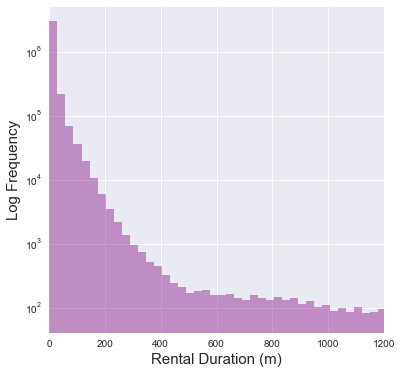

In [29]:
fig, ax = plt.subplots(1)
fig.set_size_inches(6,6)
sns.distplot(bike2016['duration'], bins=50, ax=ax, color='purple',kde=False)
ax.set_xlabel('Rental Duration (m)',fontsize=15)
ax.set_ylabel('Log Frequency',fontsize=15)
ax.set(xlim=(0, 1200))
ax.set_yscale('log')
plt.savefig('bike_histo2',bbox_inches='tight',dpi=300)

#### Merge 2015 and 2016 for the complete training dataset.

In [26]:
bike2015_2016 = bike2015.append(bike2016)

In [8]:
bike2015_2016.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6519900 entries, 2015-01-01 00:02:44 to 2016-12-31 23:54:20
Data columns (total 13 columns):
duration      int64
enddate       object
startlocID    int64
startloc      object
endlocID      int64
endloc        object
bikeID        object
memtype       object
startdate     datetime64[ns]
timeDelt      int64
Year          int64
Month         int64
Day           int64
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 696.4+ MB


Text(0,0.5,'Rental Duration (m)')

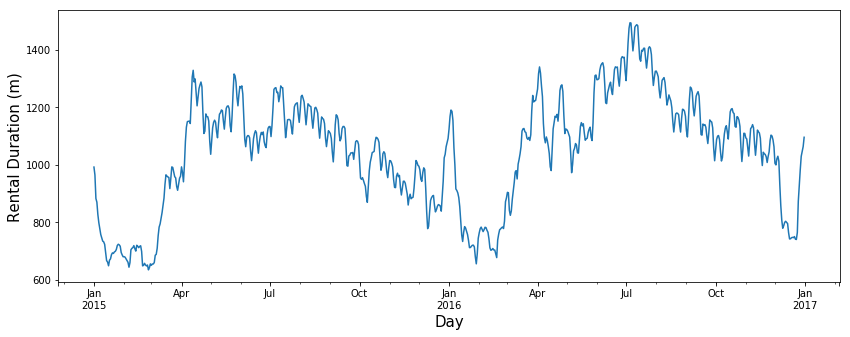

In [9]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(14,5)
duration = bike2015_2016['duration']
smoothed = duration.resample('D').mean().rolling(window=12, min_periods=1).mean()
smoothed.plot(ax=ax)
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Rental Duration (m)',fontsize=15)

Are there different durations for registered versus casual members?

In [27]:
durationReg = bike2015_2016['duration'][bike2015_2016['memtype']=='Member']
durationCas = bike2015_2016['duration'][bike2015_2016['memtype']=='Casual']

smoothedReg = durationReg.resample('D').mean().rolling(window=12, min_periods=1).mean()
smoothedCas = durationCas.resample('D').mean().rolling(window=12, min_periods=1).mean()

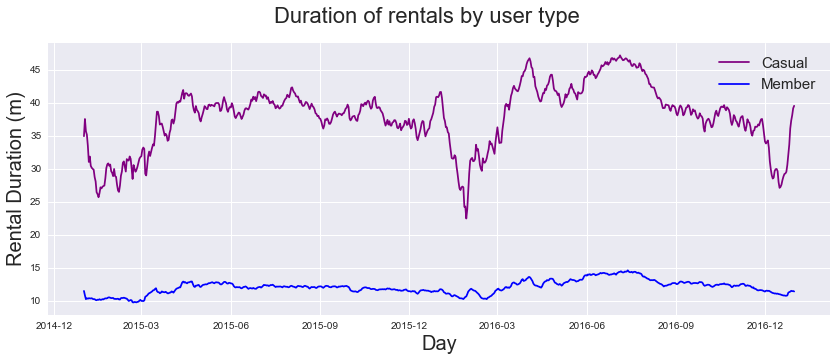

In [28]:
fig, ax = plt.subplots(1)
fig.set_size_inches(14,5)
ax.plot(smoothedCas, label='Casual', color='purple')
ax.plot(smoothedReg, label='Member', color='blue')
ax.set_xlabel('Day',fontsize=20)
ax.set_ylabel('Rental Duration (m)',fontsize=20)
fig.suptitle('Duration of rentals by user type', fontsize=22)
ax.legend(fontsize=15)
plt.savefig('bike_rolling_type',bbox_inches='tight',dpi=300)

In [13]:
bike2015_2016['startweekday'] = bike2015_2016['startdate'].apply(lambda d: d.weekday())

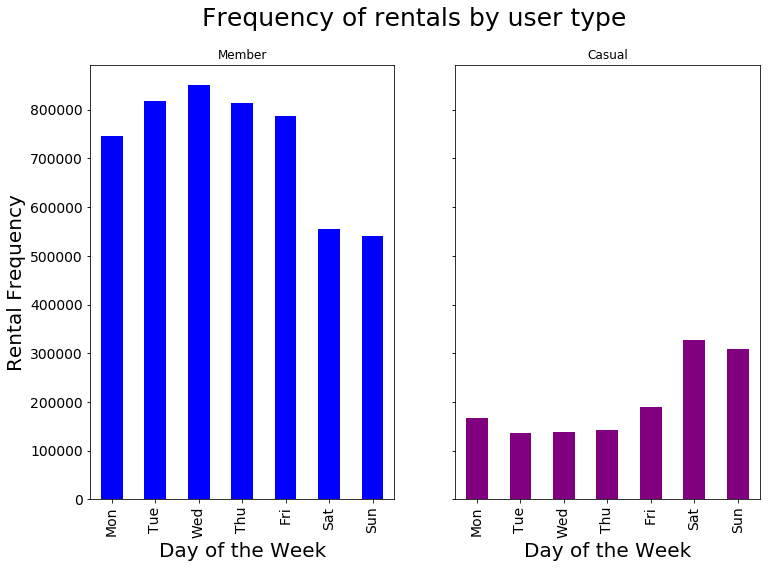

In [20]:
FreqReg=bike2015_2016['startweekday'][bike2015_2016['memtype']=='Member'].value_counts().sort_index()
FreqCas=bike2015_2016['startweekday'][bike2015_2016['memtype']=='Casual'].value_counts().sort_index()
ticks=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'] 
fig, axes = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(12,8)
FreqReg.plot(kind='bar', ax=axes[0],title='Member',fontsize=14, color='blue')
FreqCas.plot(kind='bar', ax=axes[1],title='Casual',fontsize=14, color='purple')
axes[0].set_xticklabels(ticks)
axes[1].set_xticklabels(ticks)
fig.suptitle('Frequency of rentals by user type', fontsize=25)
axes[0].set_xlabel('Day of the Week',fontsize=20)
axes[0].set_ylabel('Rental Frequency',fontsize=20)
axes[1].set_xlabel('Day of the Week',fontsize=20)
plt.savefig('bike_histo_type',bbox='tight',dpi=300)

## Analysis Steps

- Predict demand (# of rentals) on a given day (e.g. for 2017) 
    - linear regression/SVM
    - X: julian day; y: count/day
    - could add X: daily max temp, daily min temp, proximity to metro station
- Predict demand on a given day by station ID
    - linear regression/SVM
    - X: julian day, staion ID; y: count/day/station
    - coul add X: daily max temp, daily min temp, proximity to metro station


#### DC Metro Stations

In [70]:
#find metro station info (euclidian distance... find lat/long of metro stations)
import json
from pandas.io.json import json_normalize

json_data=open('../CapstoneDrafts/data/stations2.json').read()
metro=pd.read_json(json_data, orient='records')
MetroDF = json_normalize(data=metro['Stations'])

print('Number of stations:',len(MetroDF))
MetroDF.head()

Number of stations: 95


,Address.City,Address.State,Address.Street,Address.Zip,Code,Lat,LineCode1,LineCode2,LineCode3,LineCode4,Lon,Name,StationTogether1,StationTogether2
0,Washington,DC,607 13th St. NW,20005,A01,38.898303,RD,None,None,None,-77.028099,Metro Center,C01,
1,Washington,DC,1001 Connecticut Avenue NW,20036,A02,38.903192,RD,None,None,None,-77.039766,Farragut North,,
2,Washington,DC,1525 20th St. NW,20036,A03,38.909499,RD,None,None,None,-77.043620,Dupont Circle,,
3,Washington,DC,"2700 Connecticut Ave., NW",20008,A04,38.924999,RD,None,None,None,-77.052648,Woodley Park-Zoo/Adams Morgan,,
4,Washington,DC,3599 Connecticut Avenue NW,20008,A05,38.934703,RD,None,None,None,-77.058226,Cleveland Park,,


This table contains all of the metro station information for DC. I won't include it in the analysis, but will leave it here in case it helps with interpretation later.

#### Weather

In [21]:
# find and add weather data (daily max & min)
weather = pd.read_csv('../CapstoneDrafts/data/dc_weather_15_16.csv', parse_dates=True, index_col=1, header=0,
                        names=['station','startdate','precip','tmax','tmin'])
weather.head()

,station,precip,tmax,tmin
startdate,,,,
2015-01-01,USC00186350,0.00,36.0,22.0
2015-01-02,USC00186350,0.00,44.0,27.0
2015-01-03,USC00186350,0.07,47.0,29.0
2015-01-04,USC00186350,0.52,56.0,31.0
2015-01-05,USC00186350,0.08,66.0,40.0


In [72]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2015-01-01 to 2016-12-31
Data columns (total 4 columns):
station    726 non-null object
precip     722 non-null float64
tmax       720 non-null float64
tmin       720 non-null float64
dtypes: float64(3), object(1)
memory usage: 28.4+ KB


These data are weather for 2016 in DC at the National Arboretum weather station. I gathered this data from NOAA's National Climate Data Center, Climate Data Online request form. Each row contains maximum and minimum temperatures for a day in 2016, in Farenheit.  

In [73]:
weather.describe()

,precip,tmax,tmin
count,722.000000,720.000000,720.000000
mean,0.112022,68.930556,49.431944
std,0.298334,18.512655,18.054032
min,0.000000,19.000000,4.000000
25%,0.000000,54.000000,35.000000
50%,0.000000,71.000000,50.000000
75%,0.060000,85.000000,66.000000
max,2.850000,99.000000,81.000000


Temperatures in DC (at the National Arboretum) rance from 11-99 F in 2016.  Average high temperature is 69 F and average low temperature is 50 F. Average daily precipitation is .11", with 2.85" in one day being the maximum for the 2015-2016 period.

Temperature squared might be a better predictor, so let's also calculate that in the ```weather``` dataframe.

In [22]:
weather['tmax_sq'] = weather['tmax'].apply(lambda t: t**2)
weather['tmin_sq'] = weather['tmin'].apply(lambda t: t**2)

#### Daily totals

The next step is to total all the rental events for each day in 2016.  Let's first see what that might look like with a histogram using the 'timeDelt' column to summarize the data.

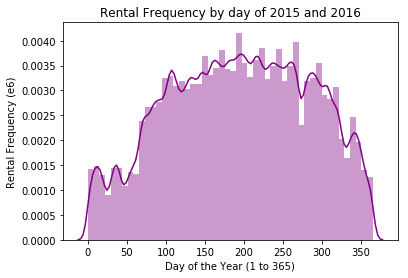

In [27]:
fig,ax = plt.subplots(1,1)
sns.distplot(bike2015_2016['timeDelt'], color='purple')
ax.set_xlabel('Day of the Year (1 to 365)')
ax.set_ylabel('Rental Frequency (e6)')
ax.set_title('Rental Frequency by day of 2015 and 2016')
plt.savefig('histo_timedelt',bbox_inches='tight',dpi=300)

It looks like the number of rentals is greatest from about day 75 through 325. This translates to March 15 through November 20.  One might guess this pattern correlates with weather, but let's keep moving.

In [40]:
grouped = bike2015_2016.groupby(['Year','timeDelt'])['Year','Month','Day','startdate','timeDelt','startweekday'].max()
grouped['totalRents'] = bike2015_2016.groupby(['Year','timeDelt'])['timeDelt'].size()
grouped['timeDelt_sq'] = grouped['timeDelt'].apply(lambda s: s**2)
grouped.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 727 entries, (2015, 0) to (2016, 365)
Data columns (total 8 columns):
Year            727 non-null int64
Month           727 non-null int64
Day             727 non-null int64
startdate       727 non-null datetime64[ns]
timeDelt        727 non-null int64
startweekday    727 non-null int64
totalRents      727 non-null int64
timeDelt_sq     727 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 50.6 KB


In [41]:
grouped['startdate'] = grouped['startdate'].apply(lambda s: s.date())

In [42]:
grouped.head()

Year  Month  Day   startdate  timeDelt  startweekday  \
Year timeDelt                                                         
2015 0         2015      1    1  2015-01-01         0             3   
     1         2015      1    2  2015-01-02         1             4   
     2         2015      1    3  2015-01-03         2             5   
     3         2015      1    4  2015-01-04         3             6   
     4         2015      1    5  2015-01-05         4             0   

               totalRents  timeDelt_sq  
Year timeDelt                           
2015 0               2578            0  
     1               5108            1  
     2               1703            4  
     3               3658            9  
     4               5222           16

I've also calculated a column as the square of 'timeDelt' which will roughly estimate the cyclical pattern in yearly use patterns. In order to make merging easier later, I've also changed the data type of the 'startdate' column.

#### Holidays

In [45]:
# add holiday indicator
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2015-01-01','2016-12-31')
holidays

DatetimeIndex(['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25',
               '2015-07-03', '2015-09-07', '2015-10-12', '2015-11-11',
               '2015-11-26', '2015-12-25', '2016-01-01', '2016-01-18',
               '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-26'],
              dtype='datetime64[ns]', freq=None)

In [46]:
series=pd.DataFrame(pd.Series(1, index=holidays, name='holiday'))
series['date']=series.index
series

,holiday,date
2015-01-01,1,2015-01-01
2015-01-19,1,2015-01-19
2015-02-16,1,2015-02-16
2015-05-25,1,2015-05-25
2015-07-03,1,2015-07-03
2015-09-07,1,2015-09-07
2015-10-12,1,2015-10-12
2015-11-11,1,2015-11-11
2015-11-26,1,2015-11-26
2015-12-25,1,2015-12-25


In [47]:
grouped = pd.merge(grouped, series, left_on='startdate', right_on='date',how='left')
grouped['holiday'].fillna(0, inplace=True)

In [136]:
grouped.head()

,Year,Month,Day,startdate,timeDelt,startweekday,totalRents,timeDelt_sq,holiday,date
0,2015,1,1,2015-01-01,0,3,2578,0,0.0,NaT
1,2015,1,2,2015-01-02,1,4,5108,1,0.0,NaT
2,2015,1,3,2015-01-03,2,5,1703,4,0.0,NaT
3,2015,1,4,2015-01-04,3,6,3658,9,0.0,NaT
4,2015,1,5,2015-01-05,4,0,5222,16,0.0,NaT


#### Combine data into a common dataframe.

In [ ]:
#merge weather data

In [50]:
weather['startdate2'] = weather.index
weather['startdate2'] = weather['startdate2'].apply(lambda s: s.date())
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 726 entries, 2015-01-01 to 2016-12-31
Data columns (total 7 columns):
station       726 non-null object
precip        722 non-null float64
tmax          720 non-null float64
tmin          720 non-null float64
tmax_sq       720 non-null float64
tmin_sq       720 non-null float64
startdate2    726 non-null object
dtypes: float64(5), object(2)
memory usage: 45.4+ KB


In [51]:
totals = pd.merge(grouped, weather, how='left', left_on='startdate', right_on='startdate2')
totals.head()

,Year,Month,Day,startdate,timeDelt,startweekday,totalRents,timeDelt_sq,holiday,date,station,precip,tmax,tmin,tmax_sq,tmin_sq,startdate2
0,2015,1,1,2015-01-01,0,3,2578,0,0.0,NaT,USC00186350,0.00,36.0,22.0,1296.0,484.0,2015-01-01
1,2015,1,2,2015-01-02,1,4,5108,1,0.0,NaT,USC00186350,0.00,44.0,27.0,1936.0,729.0,2015-01-02
2,2015,1,3,2015-01-03,2,5,1703,4,0.0,NaT,USC00186350,0.07,47.0,29.0,2209.0,841.0,2015-01-03
3,2015,1,4,2015-01-04,3,6,3658,9,0.0,NaT,USC00186350,0.52,56.0,31.0,3136.0,961.0,2015-01-04
4,2015,1,5,2015-01-05,4,0,5222,16,0.0,NaT,USC00186350,0.08,66.0,40.0,4356.0,1600.0,2015-01-05


In [139]:
totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 726
Data columns (total 17 columns):
Year            727 non-null int64
Month           727 non-null int64
Day             727 non-null int64
startdate       727 non-null object
timeDelt        727 non-null int64
startweekday    727 non-null int64
totalRents      727 non-null int64
timeDelt_sq     727 non-null int64
holiday         727 non-null float64
date            0 non-null datetime64[ns]
station         722 non-null object
precip          721 non-null float64
tmax            716 non-null float64
tmin            716 non-null float64
tmax_sq         716 non-null float64
tmin_sq         716 non-null float64
startdate2      722 non-null object
dtypes: datetime64[ns](1), float64(6), int64(7), object(3)
memory usage: 102.2+ KB


Some days have missing data, so let's forward fill those values.  Especially in the case of temperature data, a forward fill makes sense since one day's weather is more closely related to the day previous than the mean of the whole year.

In [52]:
totals=totals.fillna(method='ffill')

#### Categorical variables
We also need to create dummy variable columns for weekday.

In [53]:
# convert days of the week (startweekday) to dummy variable columns
weekday_dummies = pd.get_dummies(totals['startweekday'], prefix='day')
totals = pd.merge(totals, weekday_dummies, how='outer', left_index=True, right_index=True)

In [142]:
totals.head()

,Year,Month,Day,startdate,timeDelt,startweekday,totalRents,timeDelt_sq,holiday,date,...,tmax_sq,tmin_sq,startdate2,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,2015,1,1,2015-01-01,0,3,2578,0,0.0,NaT,...,1296.0,484.0,2015-01-01,0,0,0,1,0,0,0
1,2015,1,2,2015-01-02,1,4,5108,1,0.0,NaT,...,1936.0,729.0,2015-01-02,0,0,0,0,1,0,0
2,2015,1,3,2015-01-03,2,5,1703,4,0.0,NaT,...,2209.0,841.0,2015-01-03,0,0,0,0,0,1,0
3,2015,1,4,2015-01-04,3,6,3658,9,0.0,NaT,...,3136.0,961.0,2015-01-04,0,0,0,0,0,0,1
4,2015,1,5,2015-01-05,4,0,5222,16,0.0,NaT,...,4356.0,1600.0,2015-01-05,1,0,0,0,0,0,0


In [143]:
totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 726
Data columns (total 24 columns):
Year            727 non-null int64
Month           727 non-null int64
Day             727 non-null int64
startdate       727 non-null object
timeDelt        727 non-null int64
startweekday    727 non-null int64
totalRents      727 non-null int64
timeDelt_sq     727 non-null int64
holiday         727 non-null float64
date            0 non-null datetime64[ns]
station         727 non-null object
precip          727 non-null float64
tmax            727 non-null float64
tmin            727 non-null float64
tmax_sq         727 non-null float64
tmin_sq         727 non-null float64
startdate2      727 non-null object
day_0           727 non-null uint8
day_1           727 non-null uint8
day_2           727 non-null uint8
day_3           727 non-null uint8
day_4           727 non-null uint8
day_5           727 non-null uint8
day_6           727 non-null uint8
dtypes: datetime64[ns](1), float6

In [54]:
totals.to_csv('../CapstoneDrafts/data/2015_16totals.csv', index=False)

Model building continues in 'bikeshare_model' notebook.